# Return Inside Twenty-Five Rate (RIT-F Rate)
How often do kickoff returns end up inside the receiving 25 yardline (RIT-F Rate)?

Why does it matter?


**Hypothesis**

*Kicking Team* - Having a high RIT-F Rate would be ideal. That means you are keeping opponents inside their own 25 yardline on kickoffs, which is better than kicking the ball through the endzone for a touchback.

*Receiving Team* - Having a low RIT-F Rate would be ideal. That means you are making it past your own 25 yardline which is better than if you had taken a touchback.

**In Summary**

It tells a team whether or not it would be ideal to take a touchback (if possible) against a particular opponents kicking or receiving team.

# Table of Contents
* [Visualizing a Kickoff Return](#Visualizing-a-Kickoff-Return)
* [Expected Points](#Expected-Points)
* [Kicking Team RIT-F Rate](#Kicking-Team-RIT-F-Rate)
* [Receiving Team RIT-F Rate](#Receiving-Team-RIT-F-Rate)
* [Utilizing Team RIT-F Data](#Utilizing-Team-RIT-F-Data)


* [Appendix](#Appendix)
    * [Setup](#Setup)
    * [Read Data](#Read-Data)
    * [Animating Plays](#Animating-Plays)
        * [Show a random kickoff return](#Show-a-random-kickoff-return)
    * [Expected Points Graphing](#Expected-Points-Graphing)
    * [Returns Inside Twenty-Five and Rating](#Returns-Inside-Twenty-Five-and-Rating)

# Visualizing a Kickoff Return
60.86% of the time, kickoffs end up going for a touchback and the receiving team's starting ball position becomes the 25 yardline.* However, when a return attempt is made  (37.24% of kickoffs*), there is an opportunity for either the receiving team or the kicking team to push an advantage in their own direction.

<sub>* 2018, 2019, & 2020 seasons</sub> 

*For an actual kickoff return animation see [Show a random kickoff return](#Show-a-random-kickoff-return) in appendix. Pre-loading an animation will exceed Kaggle's notebook memory limit, so a screenshot has been provided below showing a typical kickoff formation.*

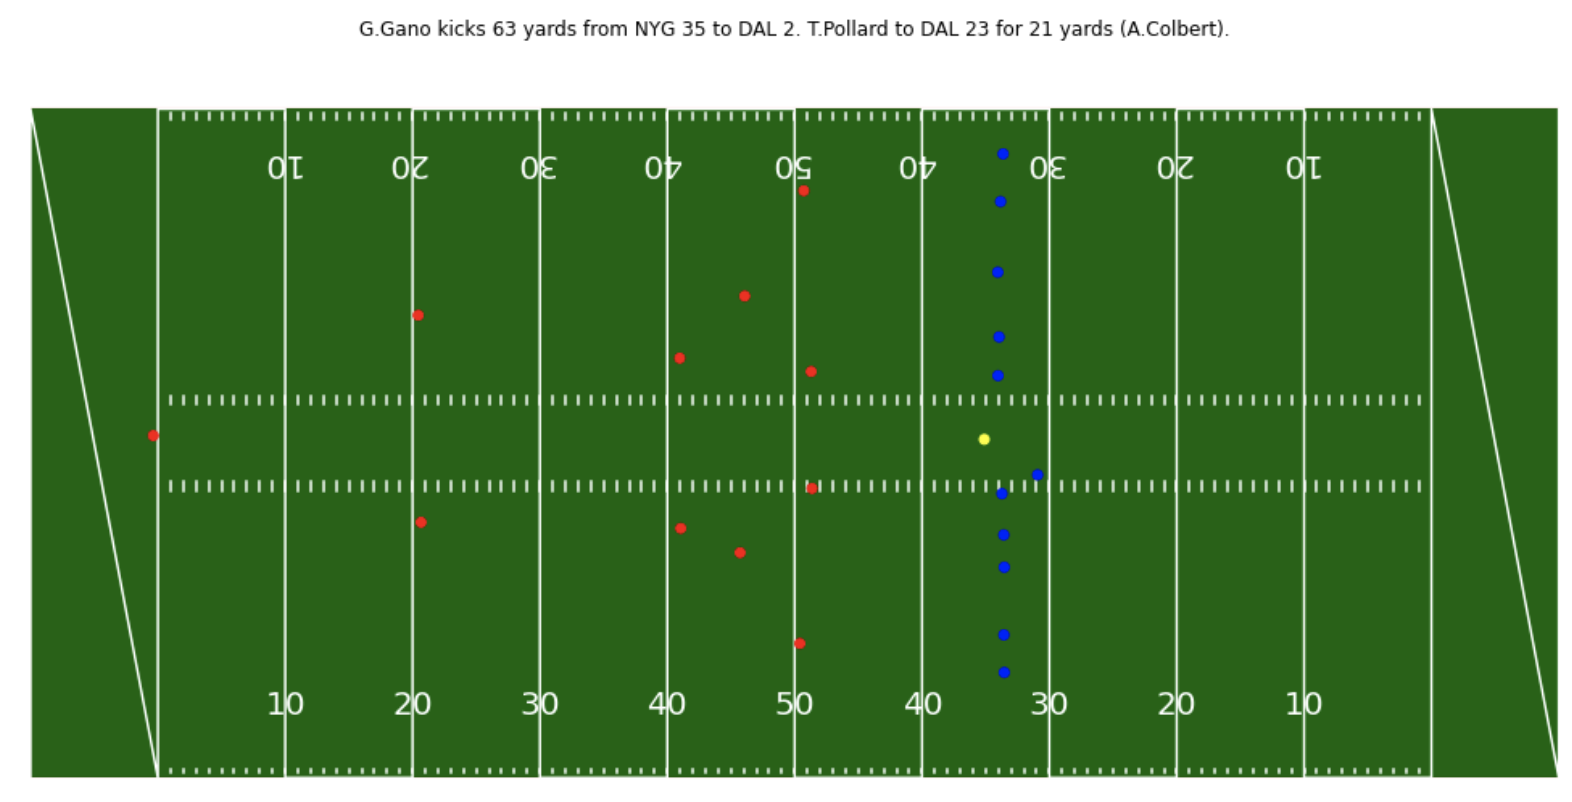


So what's the advantage?

# Expected Points
The advantage for either the kicking or receiving team comes in the form of Expected Points*. 

It perhaps comes as no surprise, the Expected Points for the receiving team, on their drive following the return, diminish the further the receiving team ends up from their scoring endzone (EZ).

<sub>* Expected Point calculation from https://www.nflfastr.com/index.html</sub>

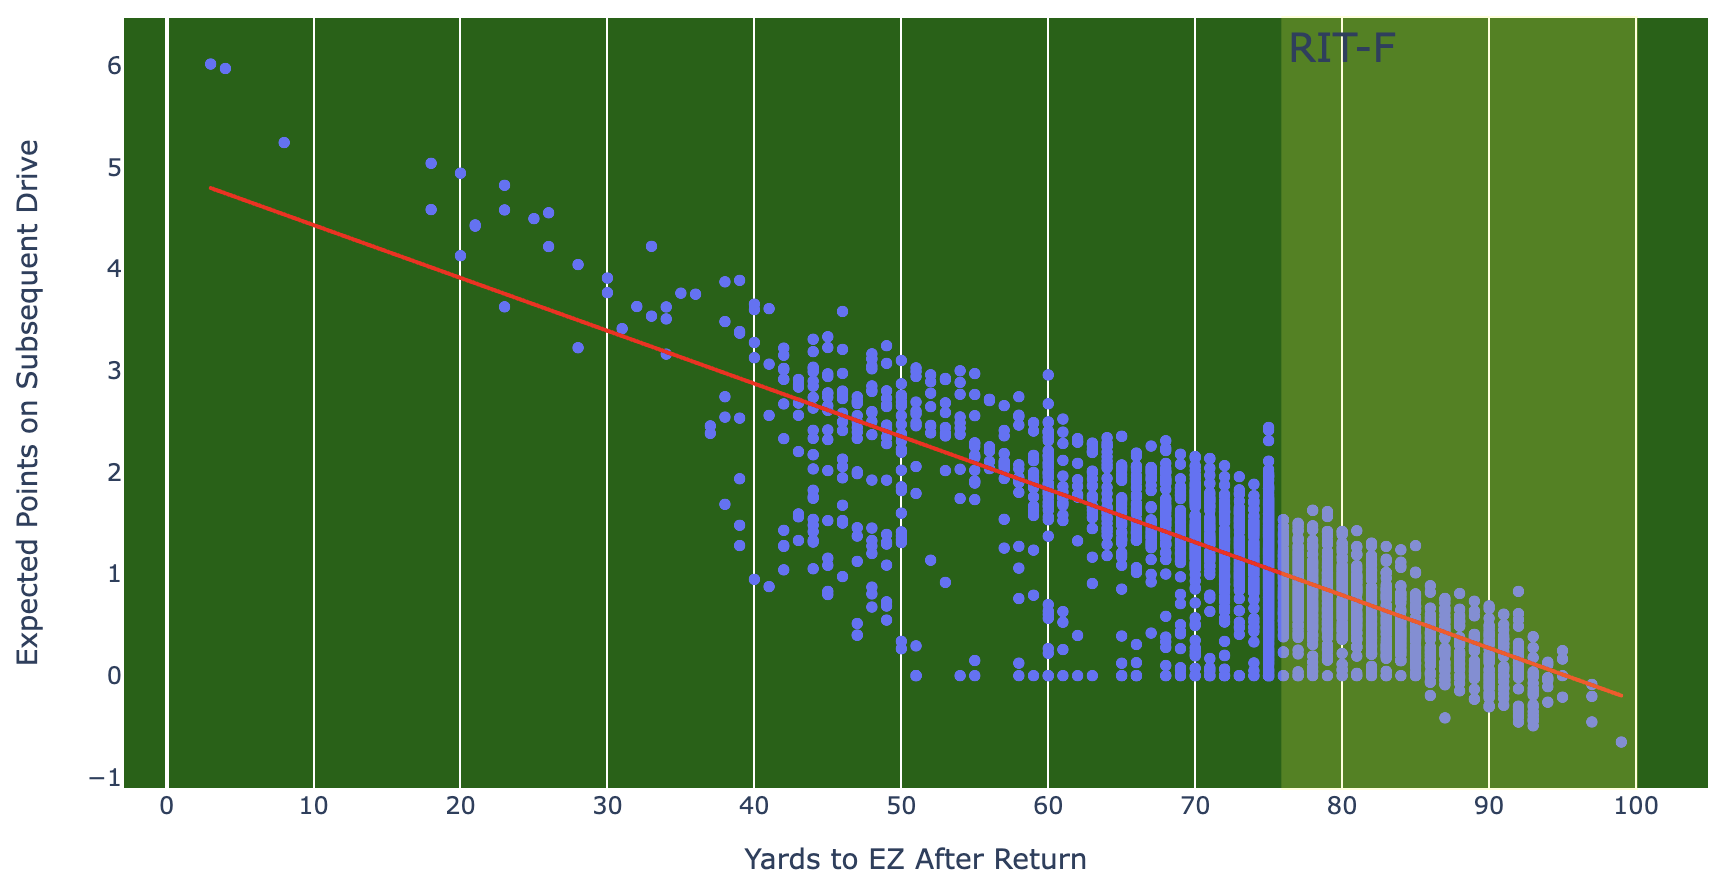

# Kicking Team RIT-F Rate
Kicking teams will want the number of returns inside the 25 yardline to be as high as possible. This minimizes the opposing team's Expected Points.


$ RIT$-$F Rate = \frac{No. Returns Inside 25}{No. Kicks} $

### 2020 Kicking Team RIT-F Rate Season Rankings

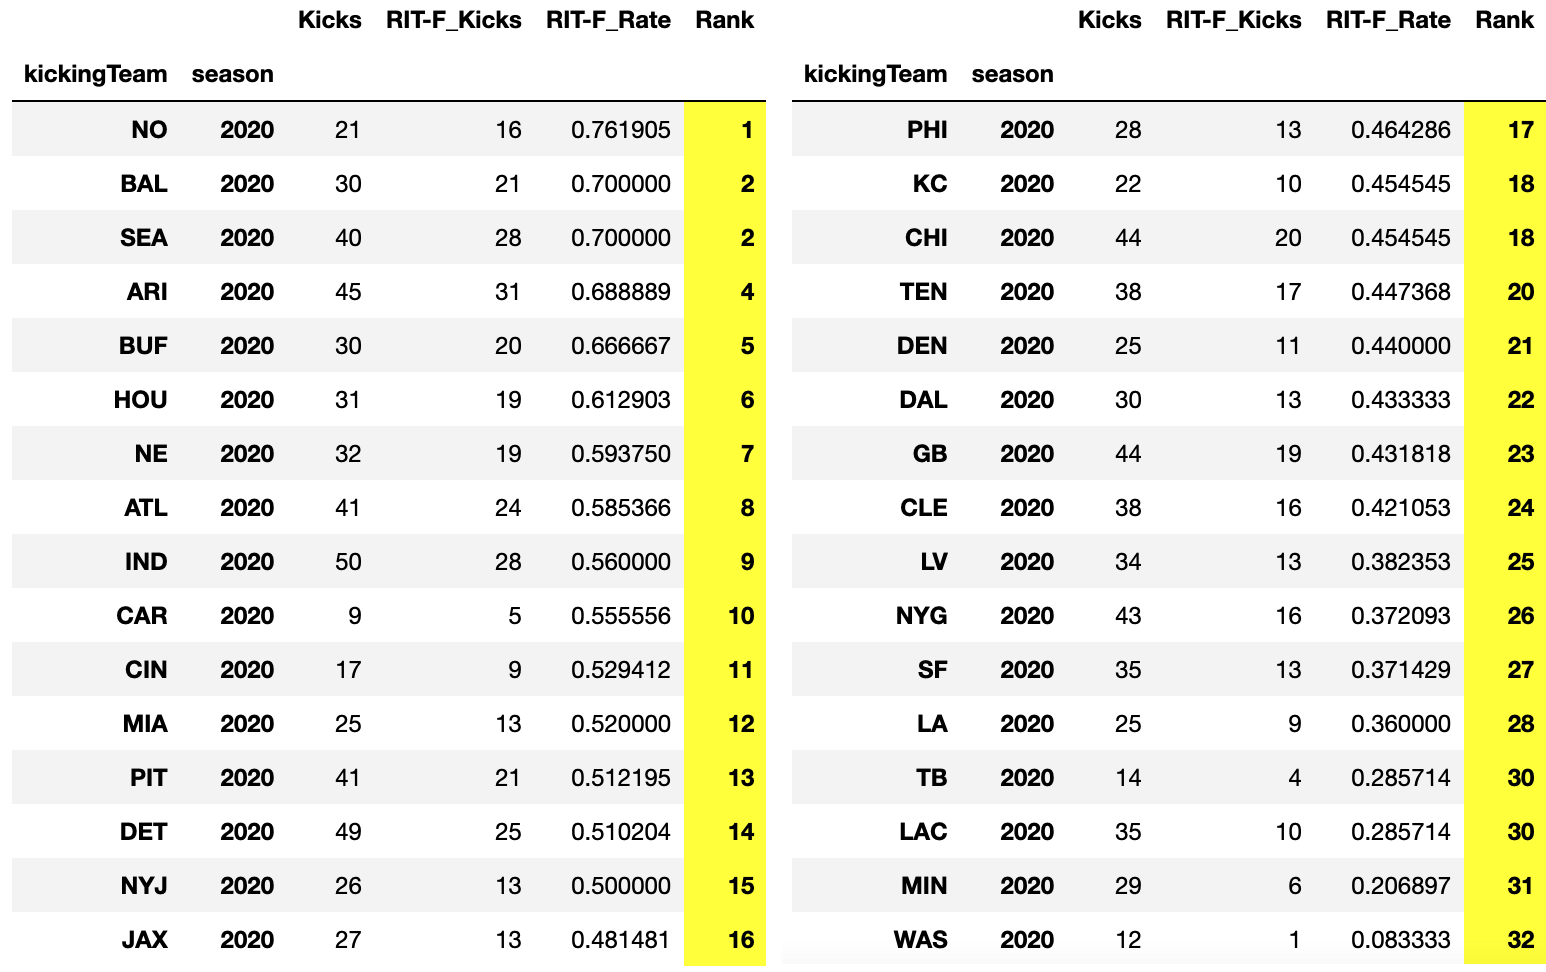

# Receiving Team RIT-F Rate
Receiving teams will want the number of returns inside the 25 yardline to be as low as possible. This maximizes their team's Expected Points.


$ RIT$-$F Rate = \frac{No. Returns Inside 25}{No. Kickoffs Received} $

### 2020 Receiving Team RIT-F Rate Season Rankings

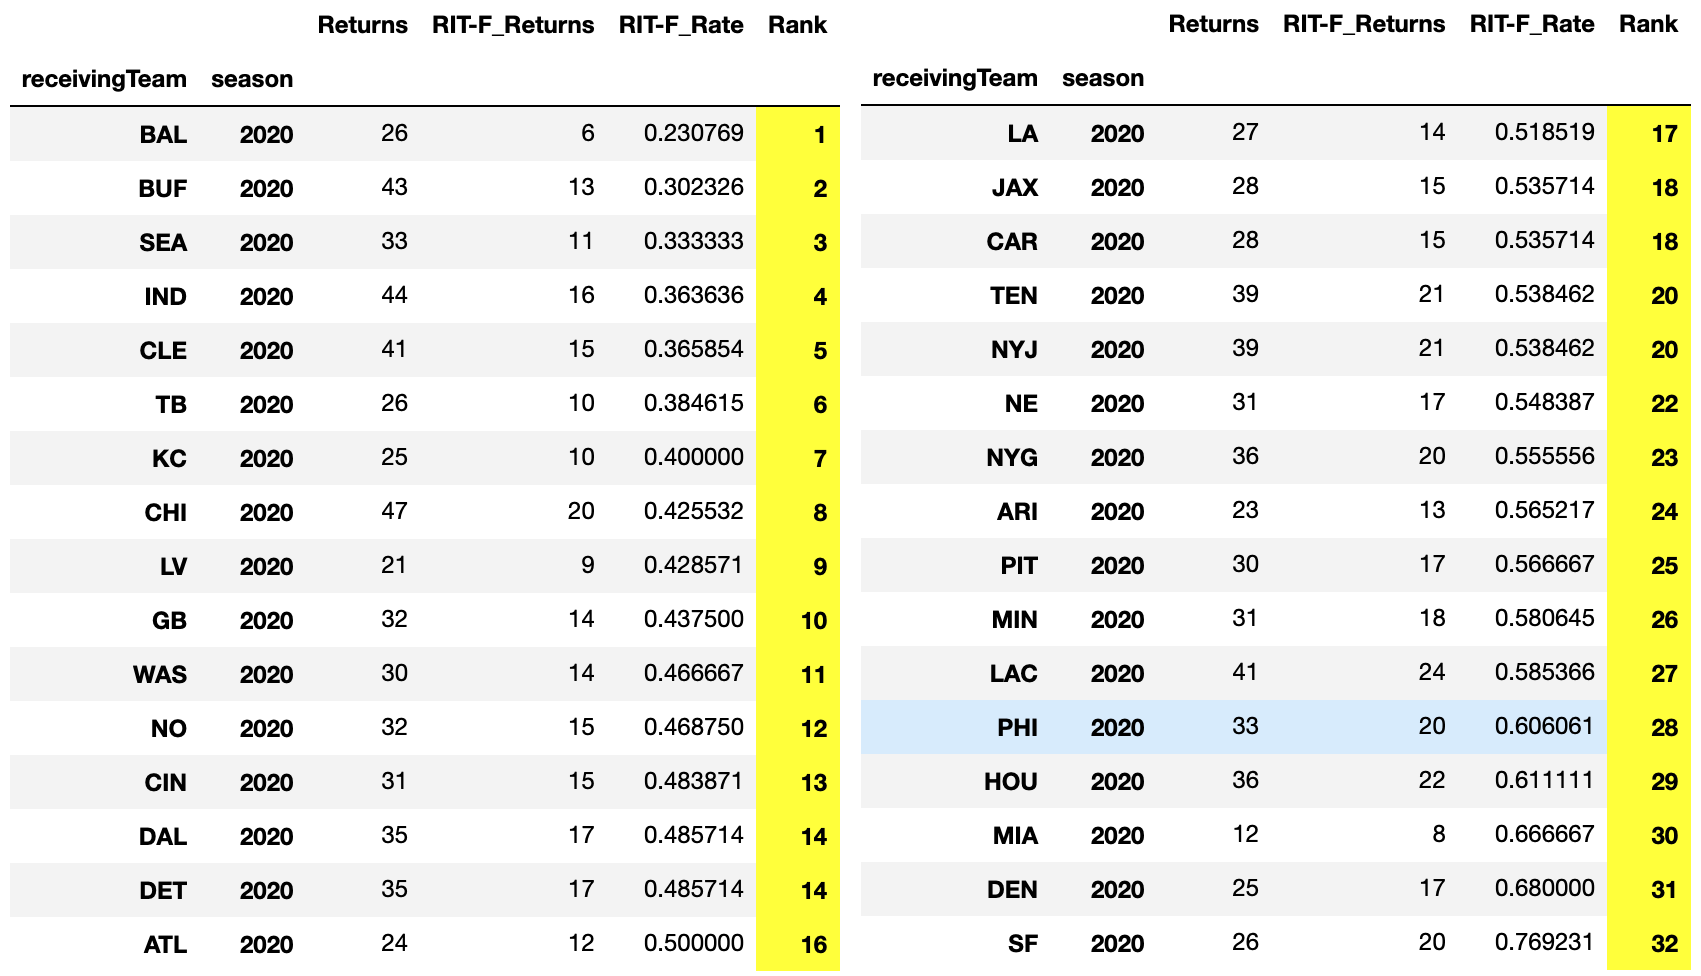

# Utilizing Team RIT-F Data

Great, so now we know which teams are doing better or worse on kickoffs returned. With this data you or your opponent can formulate a strategy.

Let's take a look at what the strategy in the 2020 season should have been for the top and bottom kicking and receiving teams given their RIT-F Rate.

---

**Top Kicking RIT-F Rate** : NO (76%) - 26 of their kickoffs returned, 16 of which ended up inside the 25-yardline.
- As New Orleans, I would be making sure that I'm not kicking through the endzone. My team is bringing the kick returners down inside the 25-yardline. I want to give them the opportunity to continue doing that.
- As an opponent, if there is a high chance of the kickoff going into the endzone then I'm going to let that happen. That will give me better field position than attempting to make a return against New Orlean's kicking team.

---

**Bottom Kicking RIT-F Rate** : WAS (8%) - 12 of their kickoffs returned, 1 of which ended up inside the 25-yardline.
- As Washington, I don't have a lot of faith in my kicking team as it stands. Only 12 of my kickoffs have been returned, probably because I'm having my kicker send the kickoffs into the endzone. I'm going to continue doing that because 11 of the 12 kickoffs that did get returned, the returner made it out past the 25-yardline.
- As an opponent, I'm returning every kick that I can against Washington. Catch it in the endzone? Return it.

---

**Top Receiving RIT-F Rate** : BAL (23%) - 26 kickoffs returned, only 6 of which ended up inside their own 25-yardline.
- As Baltimore, return every kick. I'm only getting stopped behind our 25-yardline on 23% of your returns.
- As an opponent, don't let Baltimore return the ball. Kick it past the endzone and let them take it from their own 25-yardline.

---

**Bottom Receiving RIT-F Rate** : SF (77%) - 26 kickoffs returned, 20 of which ended up inside their own 25-yardline.
- As San Francisco, I'm going to try to take a touchback. We aren't doing well when returning the ball.
- As an opponent, I'm going to try to force a return. This will give me a good chance of better field position than a touchback. 

---

# Appendix

## Setup

Import libraries

In [ ]:
import pandas as pd

import matplotlib.animation as animation
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import plotly.express as px

from IPython.display import HTML

from ipywidgets import interact

Pandas settings

In [ ]:
pd.options.display.max_columns = 500
pd.options.display.max_rows = 100

Colors

In [ ]:
color_map = {
    'home': 'blue',
    'away': 'red',
    'football': 'yellow'
}

## Read Data
Load the csv data into pandas dataframes.

### Competition Data

In [ ]:
# Reference Data
df_games = pd.read_csv('../input/nfl-big-data-bowl-2022/games.csv')
df_plays = pd.read_csv('../input/nfl-big-data-bowl-2022/plays.csv')
df_players = pd.read_csv('../input/nfl-big-data-bowl-2022/players.csv')

# Tracking Data
seasons = [2018, 2019, 2020]
tracking_dfs = [pd.read_csv(f'../input/nfl-big-data-bowl-2022/tracking{szn}.csv') for szn in seasons]
df_tracking = pd.concat(tracking_dfs)

# Scouting Data
df_scouting = pd.read_csv('../input/nfl-big-data-bowl-2022/PFFScoutingData.csv')

### Publicly Available External Data
Use the nflfastR data to calculate the expected points based on the starting yardline of the drive following the kickoff

Source: https://www.nflfastr.com/index.html

In [ ]:
# Calculate the Expected Points based on kickoff return start yardline
df_nflfastr = pd.DataFrame()
for szn in seasons:  
    #low_memory=False eliminates a warning
    szn_df = pd.read_csv('https://github.com/nflverse/nflfastR-data/blob/master/data/' \
                         'play_by_play_' + str(szn) + '.csv.gz?raw=True',
                         compression='gzip', low_memory=False)

    #sort=True eliminates a warning and alphabetically sorts columns
    df_nflfastr = df_nflfastr.append(szn_df, sort=True)

df_ep = df_nflfastr[
    (df_nflfastr.drive_start_transition == 'KICKOFF') & (df_nflfastr.down == 1)
].groupby(['game_id', 'drive']).agg({
    'posteam': 'first',
    'drive_ended_with_score': 'max',
    'drive_start_transition': 'first',
    'drive_end_transition': 'first',
    'extra_point_result': 'last',
    'two_point_conv_result': 'last',
    'field_goal_result': 'last',
    'ep': 'first',
    'drive_start_yard_line': 'first',
    'yardline_100': 'first'
}).reset_index()

## Animating Plays

In [ ]:
def fetch_play(**kwargs):
    # Get a random play
    plays = df_plays.copy()
    for k, v in kwargs.items():
        plays = plays[plays[k].isin(v)]
        
    play = plays.sample(n=1)

    # Merge game data
    # play = play.merge(df_games, on='gameId')

    # Merge tracking data
    play = play.merge(df_tracking, on=['gameId', 'playId'])[[
        'x', 'y', 'frameId', 'team', 'playDescription'
    ]]
    
    return play

In [ ]:
def draw_field():
    rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1,
                             edgecolor='r', facecolor='darkgreen', zorder=0)

    fig, ax = plt.subplots(1, figsize=(17, 9.1))
    ax.add_patch(rect)

    plt.plot([0, 0, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 120],
             [0, 53.3, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
              53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 0, 53.3],
             color='white')
      
    for i in range(20, 110, 10):
        val = i
        if i > 50:
            val = 120 - i
        plt.text(i, 5, str(val - 10),
                 horizontalalignment='center',
                 fontsize=20,
                 color='white')
        plt.text(i - .5, 53.3 - 5, str(val - 10),
                 horizontalalignment='center',
                 fontsize=20, 
                 color='white', rotation=180)
        
    hashes = range(11, 110)
    for i in range(11, 110):
        ax.plot([i, i], [0.4, 0.7], color='white')
        ax.plot([i, i], [53.0, 52.5], color='white')
        ax.plot([i, i], [22.91, 23.57], color='white')
        ax.plot([i, i], [29.73, 30.39], color='white')
        
    plt.xlim(0, 120)
    plt.ylim(-5, 58.3)
    plt.axis('off')
    
    return fig, ax

# draw_field()
# plt.show()

In [ ]:
class PlayAnimation:
    def __init__(self, play):
        self.play = play
        self.title = play.iloc[0].playDescription

    def animate(self, i):
        df_frame = play[play.frameId == i]
        self.scat.set_offsets([(dff[1].x, dff[1].y) for dff in df_frame.iterrows()])
        
        
    def draw_play_html(self):
        self.fig, self.ax = draw_field()
        
        self.ax.set_title(self.title)
        
        # Set the first frame
        first = self.play[self.play.frameId == 1]
        self.scat = self.ax.scatter(first.x, first.y, c=first.team.apply(lambda t: color_map[t]), zorder=5)

        ani = animation.FuncAnimation(self.fig, self.animate, frames=self.play.frameId.unique())
        
        return HTML(ani.to_jshtml())

### Show a random kickoff return
Uncomment below codeblock to vizualize a random kickoff return. Left this out in order to fall within Kaggle's memory limits.

In [ ]:
# play = fetch_play(specialTeamsPlayType=['Kickoff'], specialTeamsResult=['Return'])
# html = PlayAnimation(play).draw_play_html()
# display(html)
# plt.close()

## Touchback Frequency

In [ ]:
df_tb = df_plays.copy()
df_tb = df_tb[(df_tb.specialTeamsPlayType == 'Kickoff')]
kickoffs = df_tb.shape[0]
print(f'Kickoffs: {kickoffs}')

touchbacks = df_tb.groupby('specialTeamsResult').playId.count()['Touchback']
print(f'Touchbacks: {touchbacks}')

print(f'{(touchbacks / kickoffs * 100) : .2f}%')

## Return Frequency

In [ ]:
df_rt = df_plays.copy()
df_rt = df_rt[(df_rt.specialTeamsPlayType == 'Kickoff')]
kickoffs = df_rt.shape[0]
print(f'Kickoffs: {kickoffs}')

returns = df_rt.groupby('specialTeamsResult').playId.count()['Return']
print(f'Returns: {returns}')

print(f'{(returns / kickoffs * 100) : .2f}%')

## Expected Points Graphing

In [ ]:
def expected_points_scatter():
    fig = px.scatter(
        df_ep, x='yardline_100', y='ep', 
        trendline='ols', trendline_color_override='red', 
        # trendline_options=dict(log_x=True),
        # trendline_scope='overall', 
        # marginal_x='histogram', marginal_y='histogram',
        # color='posteam',
        labels={
            'ep': 'Expected Points on Subsequent Drive',
            'yardline_100': 'Yards to EZ After Return'
        }
    )
    
    fig.add_vrect(x0=76, x1=100, line_color='yellow', fillcolor='yellow', opacity=.2, 
                  annotation_text='RIT-F', annotation_position='top left', annotation_font_size=20)
    
    fig.update_layout(
        plot_bgcolor='darkgreen',
        yaxis_showgrid=False,
        yaxis_zeroline=False,
        xaxis_dtick=10,
    )
    
    fig.show()

In [ ]:
expected_points_scatter()

## Returns Inside Twenty-Five and Rating

### Calculating Kickoff Return Yardline Metrics

In [ ]:
# Make a copy of the plays dataframe
df_ritf = df_plays.copy()

# Filter for kickoffs
df_ritf = df_ritf[(df_ritf.specialTeamsPlayType == 'Kickoff') & (df_ritf.specialTeamsResult == 'Return')]

### Identify RIT-F Plays

In [ ]:
# Calculate returns that didn't make it back past the receiving 25 yardline
df_ritf['ritf'] = (df_ritf.yardlineNumber + df_ritf.playResult) > 75

# Merge the games dataframe
df_ritf = df_ritf.merge(df_games, on='gameId')

# Detrmine the kicking and receiving teams
df_ritf['kickingTeam'] = df_ritf.possessionTeam
df_ritf['receivingTeam'] = df_ritf.apply(
    lambda r: r.homeTeamAbbr if r.homeTeamAbbr != r.kickingTeam else r.visitorTeamAbbr, axis=1
)

df_ritf = df_ritf[['gameId', 'playId', 'kickingTeam', 'receivingTeam', 'ritf', 'season', 'week']]

### Calculate Kicking RIT-F Rank

In [ ]:
# Aggregate number of kicks and number of returns inside twenty-five (ritf)
df_kicking_ritf = df_ritf.groupby([
    'kickingTeam', 'season' #, 'week'
]).agg({
    'playId': 'count', 
    'ritf': 'sum'
}).rename(columns={
    'playId': 'Kicks',
    'ritf': 'RIT-F_Kicks'
})

# Calculate the rate of returns inside twenty-five
df_kicking_ritf['RIT-F_Rate'] = df_kicking_ritf['RIT-F_Kicks'] / df_kicking_ritf['Kicks'] * -1

# Calculate a rating based normalizing values between 1 and 32
df_kicking_ritf['Rank'] = df_kicking_ritf['RIT-F_Rate'].groupby('season').rank()

# Set the ritf rate back to a positive value
df_kicking_ritf['RIT-F_Rate'] = df_kicking_ritf['RIT-F_Rate'].abs()

In [ ]:
# Display ratings by season
@interact(season=seasons)
def kicking_ritf(season=seasons):
    df = df_kicking_ritf[
        df_kicking_ritf.index.get_level_values('season') == season
    ].sort_values('Rank', ascending=True)
    df = df.style.set_properties(
        **{'font-weight': 'bold', 'background-color': 'yellow'},
        precision=1,
        subset=['Rank'], 
    ).format('{:.0f}', subset=['Rank'])
    display(df)

### Calculate Receiving RIT-F Rating

In [ ]:
# Aggregate number of kickoff receptions and number of returns inside twenty-five (ritf)
df_rec_ritf = df_ritf.groupby([
    'receivingTeam', 'season' #, 'week'
]).agg({
    'playId': 'count', 
    'ritf': 'sum'
}).rename(columns={
    'playId': 'Returns',
    'ritf': 'RIT-F_Returns'
})

# Calculate the rate of returns inside twenty-five
# Multiply by -1 as a lower rate is better for returning and we want that reflected in the rating
df_rec_ritf['RIT-F_Rate'] = df_rec_ritf['RIT-F_Returns'] / df_rec_ritf['Returns']

# Calculate a rating based normalizing values between 1 and 32
df_rec_ritf['Rank'] = df_rec_ritf['RIT-F_Rate'].groupby('season').rank()

In [ ]:
# Display ratings by season
@interact(season=seasons)
def receiving_ritf(season=seasons):
    df = df_rec_ritf[
        df_rec_ritf.index.get_level_values('season') == season
    ].sort_values('Rank', ascending=True)
    df = df.style.set_properties(
        **{'font-weight': 'bold', 'background-color': 'yellow'},
        precision=1,
        subset=['Rank'], 
    ).format('{:.0f}', subset=['Rank'])
    display(df)